## Importing libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

## Loading the dataset

In [3]:
%%time
file_path = 'data/bank_ds.csv'
data = pd.read_csv(file_path)
data.head()

CPU times: total: 62.5 ms
Wall time: 61 ms


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Making a copy of the dataset for EDA

In [4]:
%%time
df = data.copy()
df.head()

CPU times: total: 0 ns
Wall time: 4 ms


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## EDA and Data Preprocessing

In [5]:
%%time
print("The dimension of the DataFrame is,",df.shape)

The dimension of the DataFrame is, (45211, 17)
CPU times: total: 0 ns
Wall time: 938 µs


In [6]:
%%time
print("Summary of the DataFrame's structure and content.")
df.info()

Summary of the DataFrame's structure and content.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
CPU times: total: 15.6 ms
Wall time: 16.6 ms


In [7]:
%%time
df.describe()

CPU times: total: 15.6 ms
Wall time: 12 ms


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
%%time
df.select_dtypes(include='number').corr()

CPU times: total: 31.2 ms
Wall time: 6.91 ms


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [10]:
%%time
print("The Skewness of the dataset is,")
df.select_dtypes(include='number').skew()

The Skewness of the dataset is,
CPU times: total: 0 ns
Wall time: 3.01 ms


age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [11]:
%%time
print("Checking for the null values,")
df.isnull().sum()

Checking for the null values,
CPU times: total: 15.6 ms
Wall time: 12.5 ms


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
%%time
## Checking for duplicates
duplicates = df.duplicated().sum()
duplicates

CPU times: total: 15.6 ms
Wall time: 21.7 ms


0

In [13]:
%%time
# Show only the duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []
CPU times: total: 15.6 ms
Wall time: 22.5 ms


In [14]:
### There is no duplicated rows in the dataset.

## Insights

In [15]:
%%time
term_depo_holders = sum(df['y']== 'yes')
print("The total number of term deposit holders are,",term_depo_holders)

The total number of term deposit holders are, 5289
CPU times: total: 15.6 ms
Wall time: 4 ms


In [16]:
%%time
## Total number of defaulter 
defaulters = sum(df['default']=='yes')
print('Number of defaulters,', defaulters)

Number of defaulters, 815
CPU times: total: 15.6 ms
Wall time: 4.87 ms


In [17]:
%%time
## How many defaulters have term deposit
defaulters_term_depo = len(df[(df['default']=='yes') & (df['y']=='yes')])
print("The total number of defaulters who have term deposit are,",defaulters_term_depo)

The total number of defaulters who have term deposit are, 52
CPU times: total: 0 ns
Wall time: 5.01 ms


In [18]:
%%time
## How many loanholders have term deposit
loanholders_term_depo = len(df[(df['loan']=='yes') & (df['y']=='yes')])
print("The total number of loanholders who have term deposit are,", loanholders_term_depo)

The total number of loanholders who have term deposit are, 484
CPU times: total: 0 ns
Wall time: 6 ms


In [19]:
%%time
## Total number of house loan holders
house_loan = sum(df['housing']=='yes')
print("Total number of house loan holders are,",house_loan)

Total number of house loan holders are, 25130
CPU times: total: 15.6 ms
Wall time: 6 ms


## Vizualisation of data

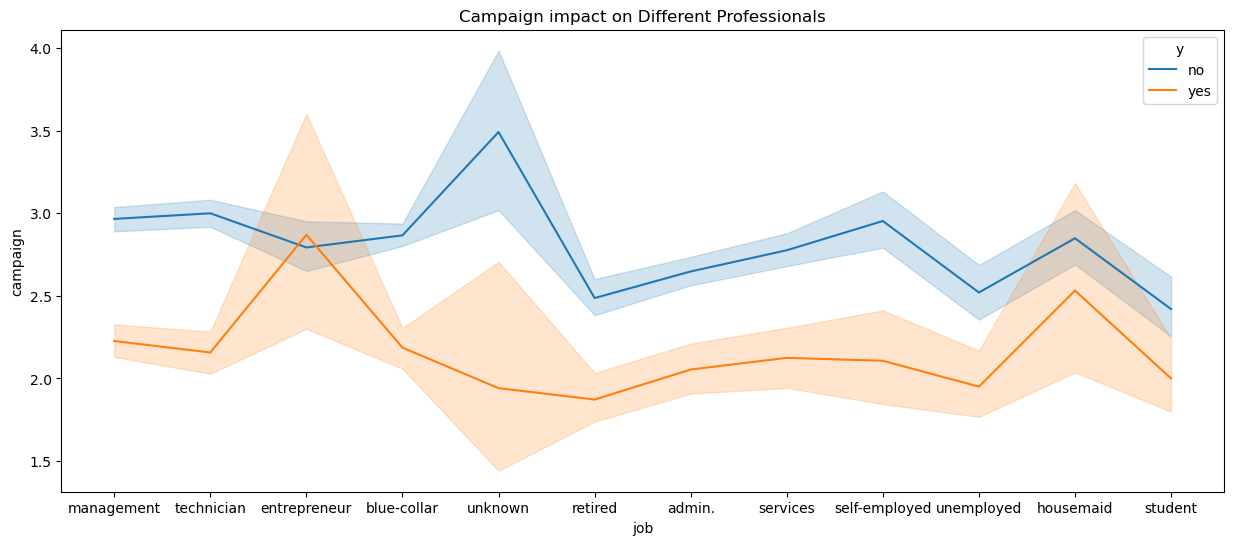

CPU times: total: 672 ms
Wall time: 676 ms


In [20]:
%%time
plt.figure(figsize=(15,6))
sns.lineplot(x='job',y='campaign', hue='y', data =df)
plt.title("Campaign impact on Different Professionals")
plt.savefig("Campaign impact on Different Professionals")
plt.show()

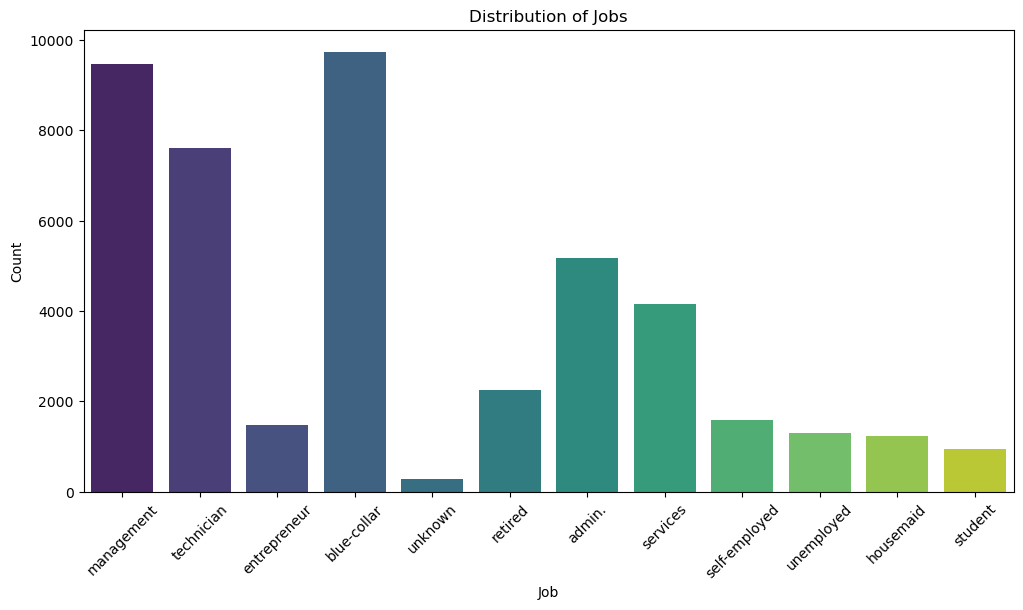

CPU times: total: 156 ms
Wall time: 151 ms


In [21]:
%%time
plt.figure(figsize=(12, 6))
sns.countplot(x='job', data=df, palette='viridis')
plt.title('Distribution of Jobs')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig("Distribution of Jobs")
plt.show()

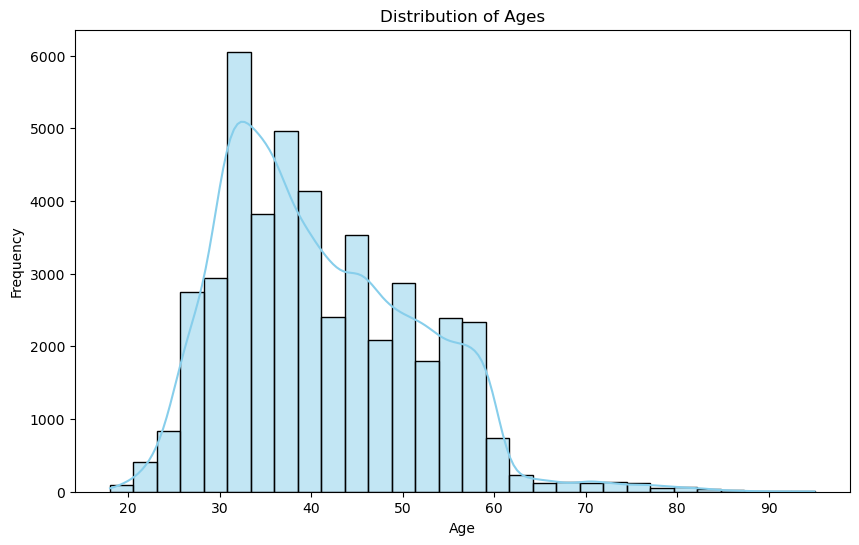

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig("Distribution of Ages")
plt.show()

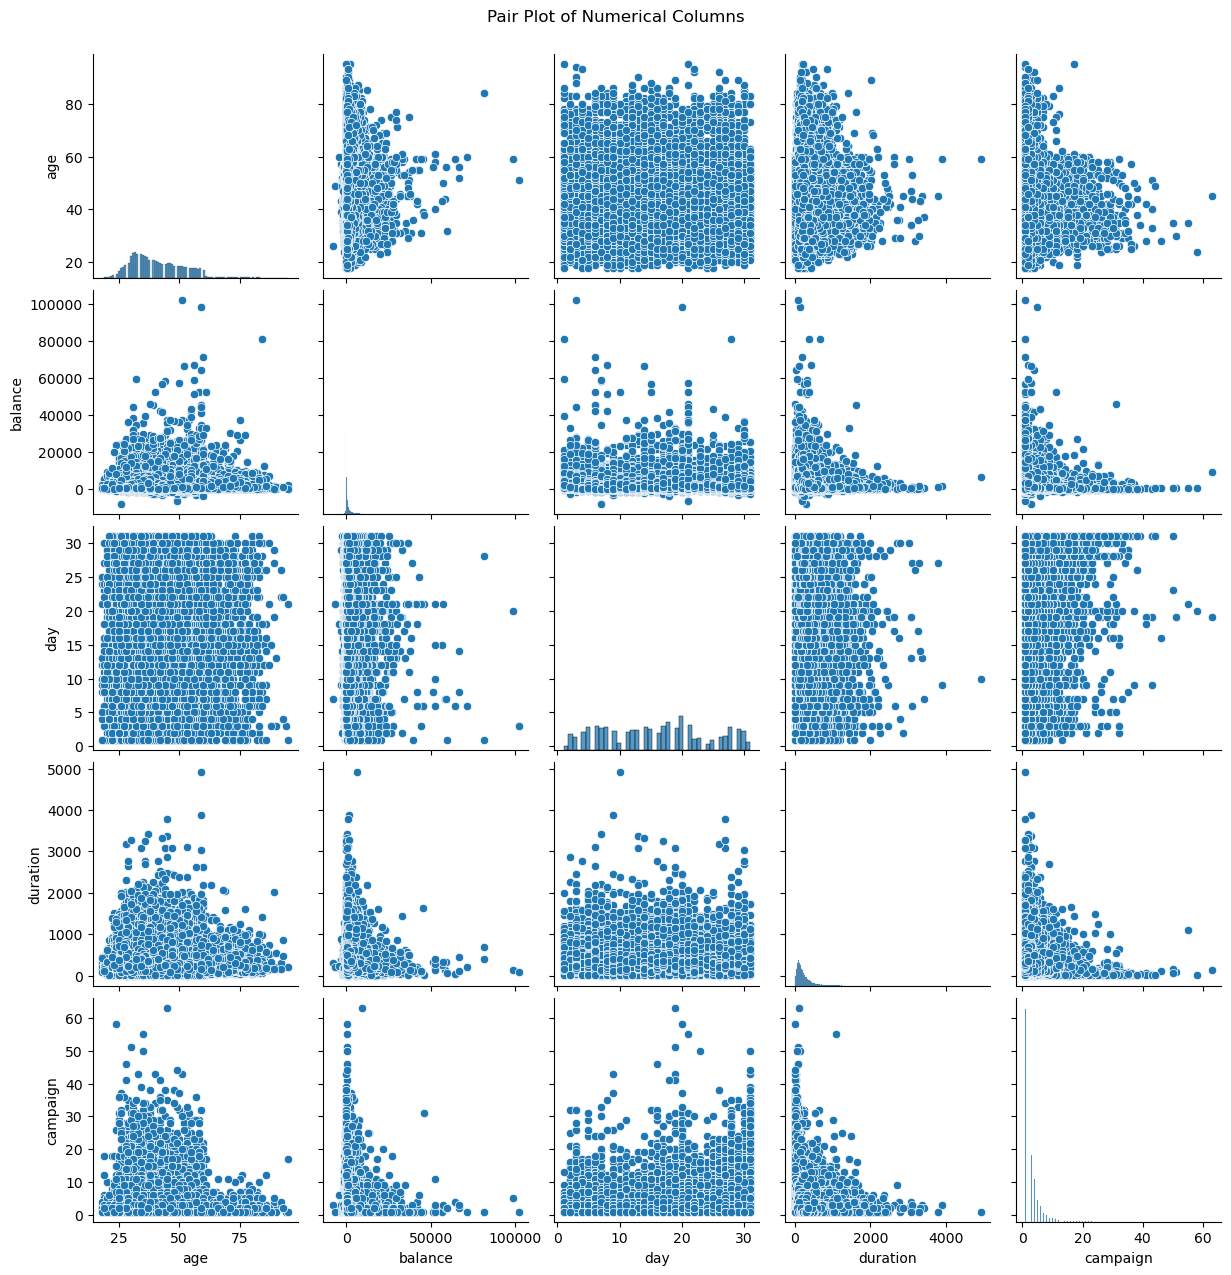

In [23]:
num_cols = ['age', 'balance', 'day', 'duration', 'campaign']
sns.pairplot(df[num_cols])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.savefig("Pair Plot")
plt.show()

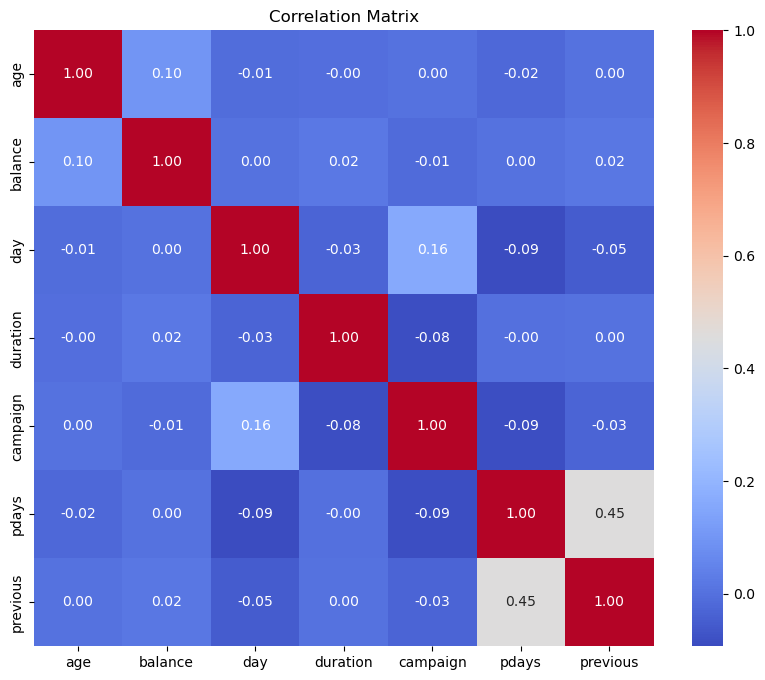

In [25]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig("Correlation Matrix")
plt.show()

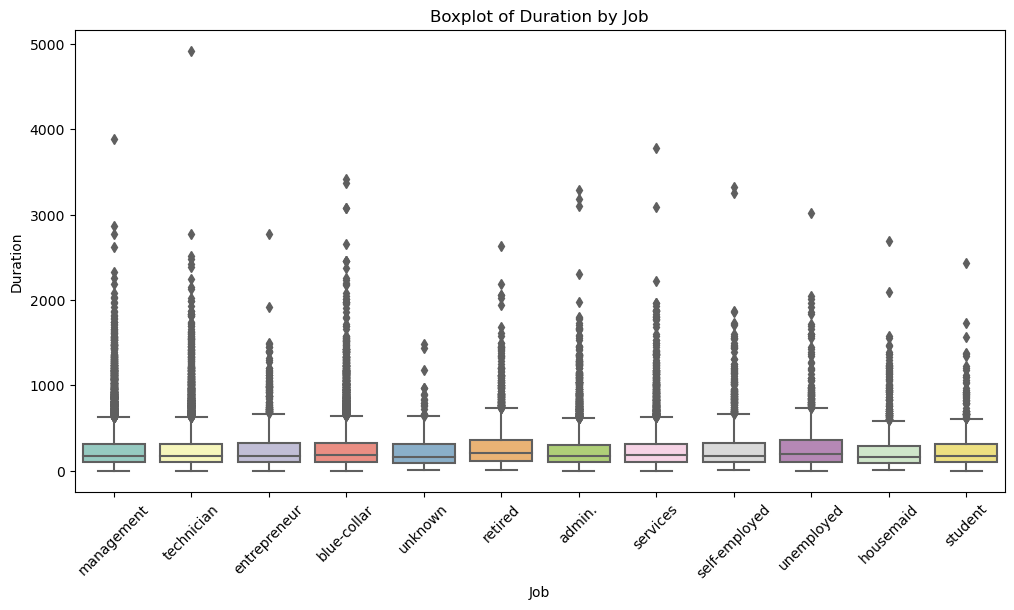

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='job', y='duration', data=df, palette='Set3')
plt.title('Boxplot of Duration by Job')
plt.xlabel('Job')
plt.ylabel('Duration')
plt.xticks(rotation=45)
plt.savefig("Boxplot of Duration by Job")
plt.show()

## Preparing the dataset for the model

In [27]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [28]:
%%time
## Encoding the data
## Encoding all the categorical column for better model accuracy
dumm = pd.get_dummies(df[['job', 'marital', 'education','contact','month','poutcome']])
dumm.head()

CPU times: total: 31.2 ms
Wall time: 18 ms


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [29]:
%%time
## Replace 'yes' by 1 and 'no' by 0 for 'default', 'housing', 'loan' nad 'y' columns
df['default'] = df['default'].replace(to_replace={'yes':1, 'no':0})
df['housing'] = df['housing'].replace(to_replace={'yes':1, 'no':0})
df['loan'] = df['loan'].replace(to_replace={'yes':1, 'no':0})
df['y'] = df['y'].replace(to_replace={'yes':1, 'no':0})

CPU times: total: 31.2 ms
Wall time: 33.1 ms


In [30]:
df1 = pd.concat([df,dumm], axis=1)
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,False,False,True,False,False,False,False,False,False,True
1,44,technician,single,secondary,0,29,1,0,unknown,5,...,False,False,True,False,False,False,False,False,False,True
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,...,False,False,True,False,False,False,False,False,False,True
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,...,False,False,True,False,False,False,False,False,False,True
4,33,unknown,single,unknown,0,1,0,0,unknown,5,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,...,False,False,False,True,False,False,False,False,False,True
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,...,False,False,False,True,False,False,False,False,False,True
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,...,False,False,False,True,False,False,False,False,True,False
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,...,False,False,False,True,False,False,False,False,False,True


## Saving the prepared dataset

In [31]:
csv_file_path = 'data/bank_ds_cleaned.csv'
df1.to_csv(csv_file_path, index=False)